In [0]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [0]:
from sklearn.datasets import make_moons

In [0]:
import pandas as pd

In [0]:
train=pd.read_csv('train.csv')
test =pd.read_csv('test.csv')

In [0]:
train.grade.unique()

array([ 7,  6,  8,  9, 10, 11, 12,  5,  4,  3, 13,  1])

In [0]:
train.shape

(15035, 21)

In [0]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [0]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
import matplotlib.pyplot as plt

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


In [0]:
print(train.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [0]:
X_all=train.drop(['price'],axis=1)
y=train.price

In [0]:
sel=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement']

In [0]:
X=X_all[sel]

In [0]:
## data split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [0]:
## model making
model=RandomForestRegressor()

In [0]:
## model train
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
## model predict
pred=model.predict(X_test)
pred


array([416163.8, 355000. , 454300. , ..., 261700. , 536020. , 396315.9])

In [0]:
df_diff=pd.DataFrame({'real':y_test,'pred':pred,'diff':y_test-pred})
df_diff

,real,pred,diff
2021,256000.0,4.161638e+05,-1.601638e+05
12670,235000.0,3.550000e+05,-1.200000e+05
4359,626700.0,4.543000e+05,1.724000e+05
10556,245500.0,2.325500e+05,1.295000e+04
3468,593450.0,3.925950e+05,2.008550e+05
10084,400000.0,3.507000e+05,4.930000e+04
927,320000.0,2.748347e+05,4.516530e+04
11672,465000.0,4.355854e+05,2.941460e+04
5180,323000.0,4.045950e+05,-8.159500e+04
9045,250000.0,4.689950e+05,-2.189950e+05


In [0]:
model.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=140980700, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=1650691580, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2,

In [0]:
print(model.feature_importances_)

[0.03754723 0.069662   0.68231498 0.21047578]


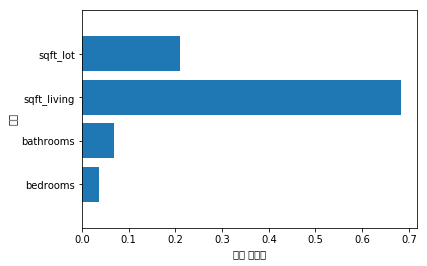

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model, dataset):
 n_features = dataset.shape[1]
 plt.barh(range(n_features), model.feature_importances_, align='center')
 plt.yticks(np.arange(n_features), dataset.columns)
 plt.xlabel("특성 중요도")
 plt.ylabel("특성")
 plt.ylim(-1, n_features)

plot_feature_importances_cancer(model, X)

In [0]:

## model making
model2=RandomForestRegressor(n_estimators=50,random_state=24,max_depth=12)
## model train
model2.fit(X_train,y_train)
## model predict
pred2=model2.predict(X_test)
pred2

array([364529.34969127, 389719.29608706, 522035.08108581, ...,
       248218.01739202, 539459.89301157, 461254.7212495 ])

In [0]:
print(model2.estimators_)
print(model2.feature_importances_)

[DecisionTreeRegressor(criterion='mse', max_depth=12, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1975759266, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=12, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1264583555, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=12, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fracti

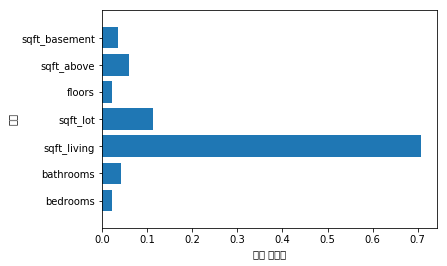

In [0]:
plot_feature_importances_cancer(model2, X)

In [0]:
df_diff2=pd.DataFrame({'real':y_test,'pred':pred2,'diff':y_test-pred2})
df_diff2

,real,pred,diff
2021,256000.0,3.645293e+05,-1.085293e+05
12670,235000.0,3.897193e+05,-1.547193e+05
4359,626700.0,5.220351e+05,1.046649e+05
10556,245500.0,2.354595e+05,1.004047e+04
3468,593450.0,4.388709e+05,1.545791e+05
10084,400000.0,3.479972e+05,5.200280e+04
927,320000.0,3.977400e+05,-7.773997e+04
11672,465000.0,4.329788e+05,3.202117e+04
5180,323000.0,4.280369e+05,-1.050369e+05
9045,250000.0,4.522193e+05,-2.022193e+05


In [0]:
rmse=np.sqrt((sum((y_test-pred2)**2))/len(pred2))

In [0]:
rmse

245065.3935590967

In [0]:
print('훈련데이터점수:{:.2f}'.format(model2.score(X_train,y_train)))
print('test데이터점수:{:.2f}'.format(model2.score(X_test,y_test)))

훈련데이터점수:0.84
test데이터점수:0.52


In [0]:
cnt=1
for model in model2.estimators_:
  model.fit(X_train,y_train)
  
  if cnt%5==0:
    print('훈련세트 정확도:{:.3f}'.format(model.score(X_train,y_train)))
    print('test세트 정확도:{:.3f}'.format(model.score(X_test,y_test)))
  cnt+=1
          

훈련세트 정확도:0.828
test세트 정확도:0.289
훈련세트 정확도:0.828
test세트 정확도:0.299
훈련세트 정확도:0.828
test세트 정확도:0.311
훈련세트 정확도:0.828
test세트 정확도:0.323
훈련세트 정확도:0.828
test세트 정확도:0.303
훈련세트 정확도:0.828
test세트 정확도:0.306
훈련세트 정확도:0.828
test세트 정확도:0.289
훈련세트 정확도:0.828
test세트 정확도:0.314
훈련세트 정확도:0.828
test세트 정확도:0.315
훈련세트 정확도:0.828
test세트 정확도:0.295


In [0]:


from sklearn.ensemble import GradientBoostingClassifier

from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,
                                                cancer.target,
                                                random_state=42)



In [0]:
X_train[0:5]

array([[1.289e+01, 1.312e+01, 8.189e+01, 5.159e+02, 6.955e-02, 3.729e-02,
        2.260e-02, 1.171e-02, 1.337e-01, 5.581e-02, 1.532e-01, 4.690e-01,
        1.115e+00, 1.268e+01, 4.731e-03, 1.345e-02, 1.652e-02, 5.905e-03,
        1.619e-02, 2.081e-03, 1.362e+01, 1.554e+01, 8.740e+01, 5.770e+02,
        9.616e-02, 1.147e-01, 1.186e-01, 5.366e-02, 2.309e-01, 6.915e-02],
       [1.340e+01, 2.052e+01, 8.864e+01, 5.567e+02, 1.106e-01, 1.469e-01,
        1.445e-01, 8.172e-02, 2.116e-01, 7.325e-02, 3.906e-01, 9.306e-01,
        3.093e+00, 3.367e+01, 5.414e-03, 2.265e-02, 3.452e-02, 1.334e-02,
        1.705e-02, 4.005e-03, 1.641e+01, 2.966e+01, 1.133e+02, 8.444e+02,
        1.574e-01, 3.856e-01, 5.106e-01, 2.051e-01, 3.585e-01, 1.109e-01],
       [1.296e+01, 1.829e+01, 8.418e+01, 5.252e+02, 7.351e-02, 7.899e-02,
        4.057e-02, 1.883e-02, 1.874e-01, 5.899e-02, 2.357e-01, 1.299e+00,
        2.397e+00, 2.021e+01, 3.629e-03, 3.713e-02, 3.452e-02, 1.065e-02,
        2.632e-02, 3.705e-03, 1.413e

In [0]:
model_boost=GradientBoostingClassifier()

In [0]:
model_boost.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
pred_boost=model_boost.predict(X_test)
pred_boost

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [0]:
pred_boost.estimators_

AttributeError: ignored

In [0]:
print('train acc:{:.2f}'.format(model_boost.score(X_train,y_train)))
print('test acc:{:.2f}'.format(model_boost.score(X_test,y_test)))

train acc:1.00
test acc:0.96


In [0]:
plot_feature_importances_cancer(model_boost)

TypeError: ignored